The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Project delivery:**

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

**Data Set:**

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

**Analysis**

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?
Does margin proportionally increase with increase in number of customers?
What are the attributes of these customer segments?
Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

Deliverables of Week 2 are:

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document) 

You can use either EDA or Modeling and EDA both to deliver the result.

Remember, there are no wrong answers as long as the data supports them.

# **Insight analysis on Two US cab companies**

###**A Machine Learning Project**
####by Fabian Chukwunonso Umeh
   ***

***
### **Phase 4 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Overview
 4. Data Handling and descriptive overview
 5. Feature creation
 6. Insight Analysis
 7. Conclusion


***
###**1. Project Overview**
**Aim of project:** Thoroughly Investigate Two Cab companies for Investment Insight.
***
### **Notebook summary - Phase 4: Forcast analysis with forcasting machine learning models**
***

**Input:** CSV (comma separated values) data file from owid website(Our World In Data).

**Output:** Forcasting model

**Programming language:** Python 3.7

**Libraries used in this notebook:** .

**External package to be installed:** .

***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:


In [40]:
!pip install holidays --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

data1 = pd.read_csv("Cab_Data.csv")
data2 = pd.read_csv("City.csv")
data3 = pd.read_csv("Customer_ID.csv")
data4 = pd.read_csv("Transaction_ID.csv")


import datetime
def timedelta_to_date(timedeltas):
  date_list = []
  for timedelta in timedeltas:
    try:
      x = datetime.date(1899,12,30) + datetime.timedelta(days=float(timedelta)) #1899,12,30 is the zero date in python
      date_list.append(x.strftime('%Y-%m-%d'))
    except:
      date_list.append('n/a')
  return date_list
#conversion from timestamp to date
data1['Date of Travel'] = timedelta_to_date(data1['Date of Travel'])
data1['Date of Travel'] = pd.to_datetime(data1['Date of Travel'])

### **3 Data Overview**

In [42]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)

(359392, 7)
(20, 3)
(49171, 4)
(440098, 3)


In [43]:
data1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [44]:
data2.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [45]:
data3.head(10)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [46]:
data4.head(10)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


### **4 Data Handling and descriptive overview**

In [47]:
#merging the datasets
city_pop = pd.merge(data1, data2, on='City', how='outer')
city_tra_AGI_data = pd.merge(data3, data4, on='Customer ID', how='outer')
Big_data = pd.merge(city_tra_AGI_data, city_pop, on='Transaction ID')

In [48]:
Big_data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [49]:
Big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  object        
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [50]:
num_col = [col for col in Big_data.columns if Big_data[col].dtype in ['float64', 'int64']]
Big_data[num_col].describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000


### **5 Feature Creation**

In [51]:
#Year, day, month
Big_data['Year'] = Big_data['Date of Travel'].dt.year
Big_data['month'] = Big_data['Date of Travel'].dt.month_name()
Big_data['day'] = Big_data['Date of Travel'].dt.day
Big_data['quarter'] = Big_data['Date of Travel'].dt.quarter



#profit
Big_data['Profit'] = Big_data['Price Charged'] - Big_data['Cost of Trip']
Big_data['Profit/KM'] = Big_data['Profit'] / Big_data['KM Travelled']

def age_group(x): 
  if x < 26: 
    return '18-25' 
  elif x < 41: 
    return '26-40' 
  elif x < 61: 
    return '41-60'
  elif x >= 60: 
    return '60+' 
  else: return 'other'

def income_group(x): 
  if x < 2500: 
    return '<2500' 
  elif x >= 2500 and x <=15000: 
    return '2500 - 15000' 
  else: 
    return '>15000'

Big_data['Age group'] = Big_data['Age'].apply(age_group)
Big_data['Income group'] = Big_data['Income (USD/Month)'].apply(income_group)

#Holiday feature creation
import holidays
US_holidays = holidays.US()
Big_data['holiday'] = ['YES' if d in US_holidays else 'NO' for d in Big_data['Date of Travel']]

### **6 Insight Analysis**

#### **Geographical analysis**

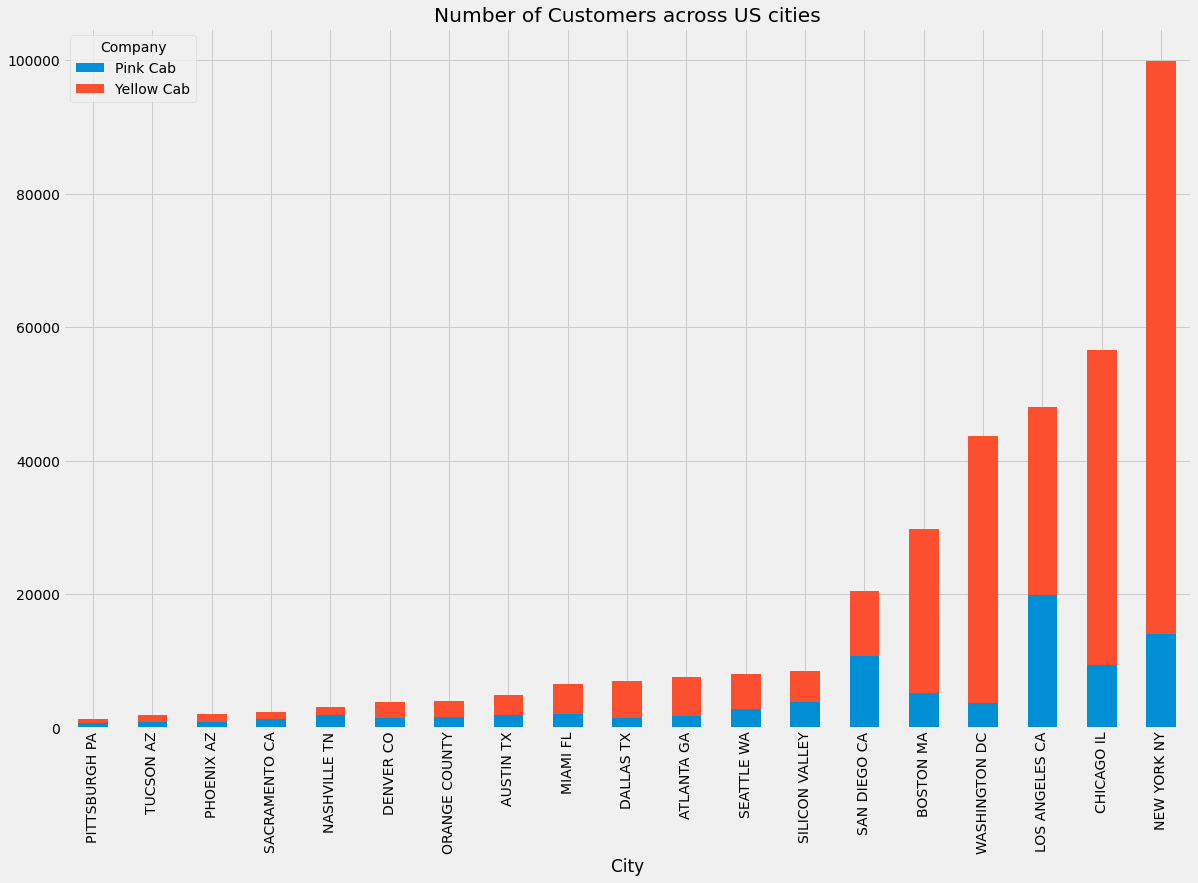

In [52]:
City_wise = Big_data.groupby(['City', 'Company']).count()['Profit/KM'].unstack('Company').reset_index()
City_wise['Total customers'] = City_wise['Yellow Cab'] + City_wise['Pink Cab']
City_wise = City_wise.sort_values(by=['Total customers'])
City_wise.drop('Total customers', axis=1).plot(
  x = 'City', 
  kind = 'bar', 
  stacked = True, 
  title = 'Number of Customers across US cities',
  figsize=(18, 12))

##### **Insights**
***
According to the graph, the pink company has the most customers in Los Angeles, CA, and the yellow company has the most customers in New York. When comparing the two companies' geographical areas, the yellow company has a much larger customer base.

### **Age segmentation analysis**

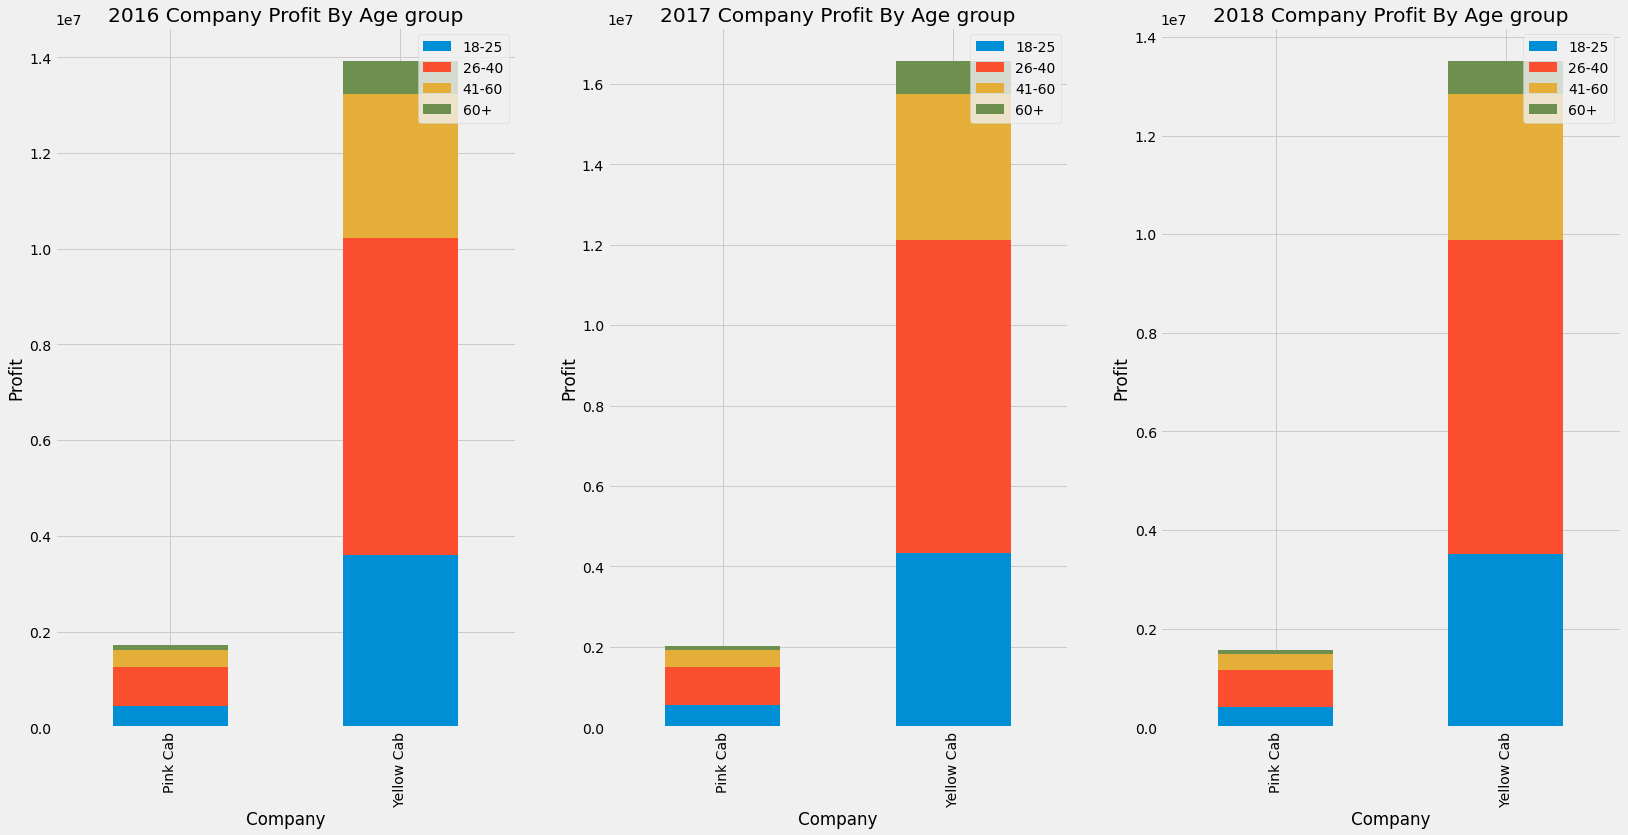

In [53]:
Age_data = Big_data.groupby(['Year', 'Company', 'Age group']).sum()['Profit'].unstack('Age group').reset_index()

def segmentation_Seasonality(df, col, name, kind):
  df1 = df[df['Year'] == 2016]
  df2 = df[df['Year'] == 2017]
  df3 = df[df['Year'] == 2018]


  fig, axes = plt.subplots(1, 3)
  fig.figsize=(18,12)
  df1.iloc[:,1:].plot(
    x = col, 
    kind = kind, 
    stacked = True,
    ax=axes[0],
    title = '2016 Company Profit By {}'.format(name),
    ylabel='Profit',
     figsize=(25, 12),
    ).legend(loc='upper right')
  df2.iloc[:,1:].plot(
    x = col, 
    kind = kind, 
    stacked = True,
    ax=axes[1],
    title = '2017 Company Profit By {}'.format(name),
    ylabel='Profit',
     figsize=(25, 12),
    ).legend(loc='upper right')
  df3.iloc[:,1:].plot(
    x = col, 
    kind = kind, 
    stacked = True,
    ax=axes[2],
    title = '2018 Company Profit By {}'.format(name),
    ylabel='Profit',
    figsize=(25, 12),
    ).legend(loc='upper right')
  return plt.show()

segmentation_Seasonality(Age_data,'Company' ,'Age group', 'bar')

##### **Insights**
***
Majority of the customers of the two companies fall between the age range of 26 - 40. However, there is no obvious difference between the two aside profit.

#### **Profit analysis**

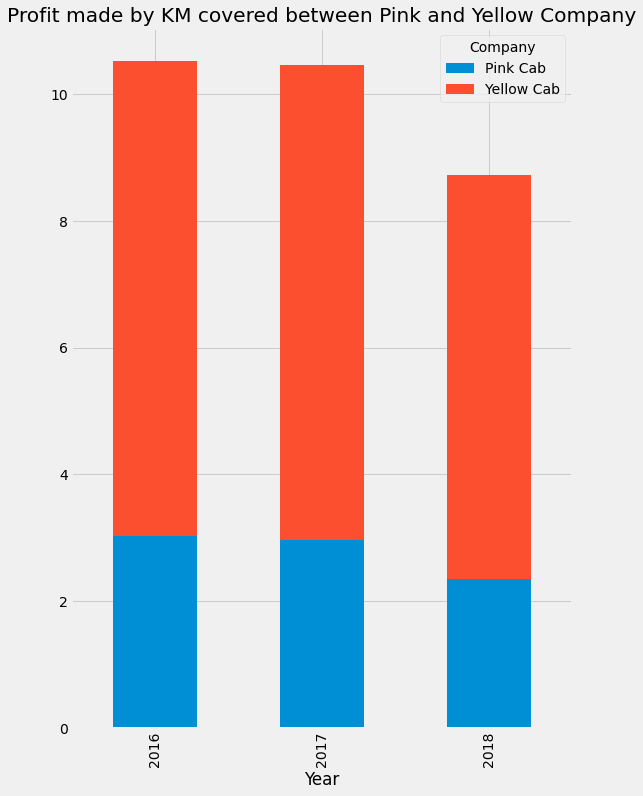

In [54]:
Profit_KM_data = Big_data.groupby(['Year', 'Company']).mean()['Profit/KM'].unstack('Company').reset_index()

Profit_KM_data.plot(
  x = 'Year', 
  kind = 'bar', 
  stacked = True, 
  title = 'Profit made by KM covered between Pink and Yellow Company',
  figsize=(8, 12))

##### **Insights**
***
Profit per kilometre covered reveals a huge disparity between the two companies, with the yellow company earning far more than the pink company.

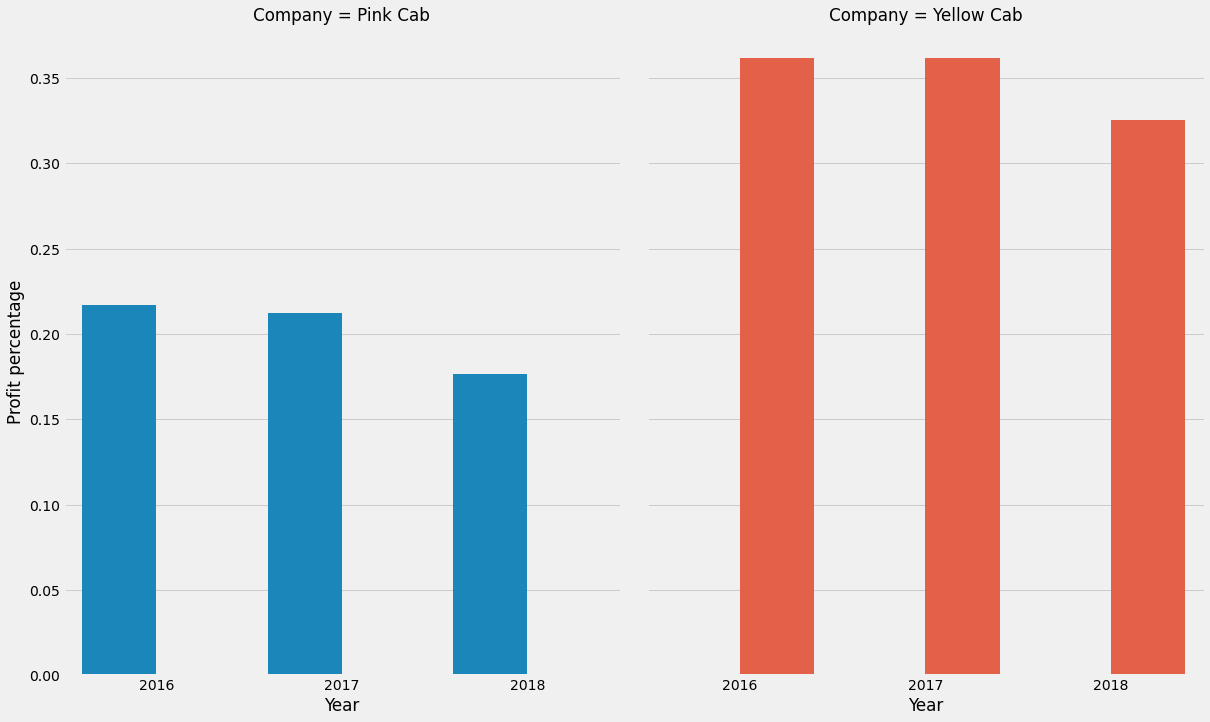

In [55]:
Profit_data = Big_data.groupby(['Year', 'Company']).mean().reset_index()
Profit_data['Profit percentage'] = (Profit_data['Price Charged'] - Profit_data['Cost of Trip']) / Profit_data['Price Charged'] 

g = sns.catplot(x = 'Year', y='Profit percentage', hue='Company', 
                data = Profit_data, col='Company',kind='bar')
g.fig.set_figwidth(18)
g.fig.set_figheight(12)

##### **Insights**
***
The profit percentage chart demonstrates that the Yellow Cab Company earns more profit than the Pink Company.

Text(0.5, 1.0, 'Profit per Rides')

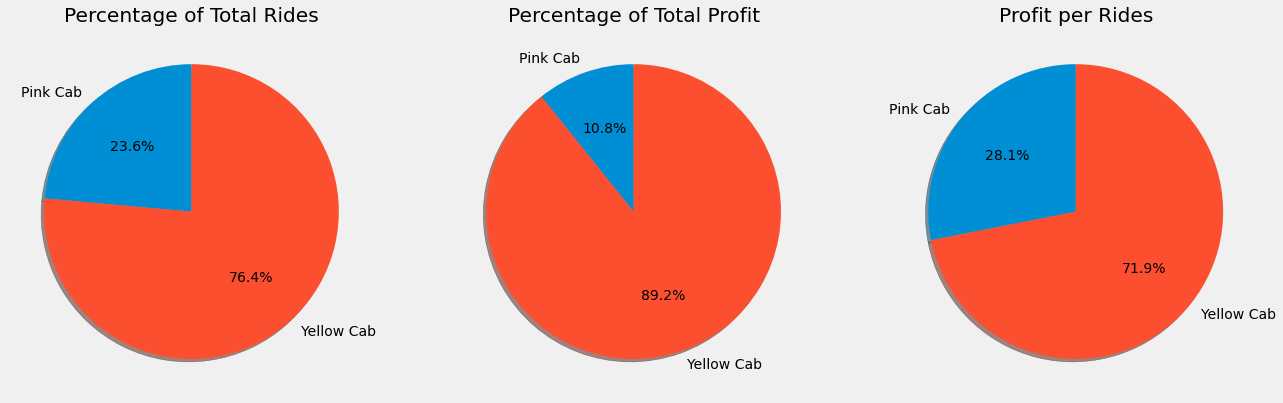

In [56]:
profit = Big_data.groupby(['Company']).sum()['Profit'].rename('Total Profit')
count = Big_data.groupby(['Company'])['Company'].count().rename('Total Rides')
Ride_data = pd.concat([profit, count], axis=1)
Ride_data['Profit per Ride'] = Ride_data['Total Profit'] / Ride_data['Total Rides']
Ride_data

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20,20)
axes[0].pie(Ride_data['Total Rides'],  labels=Ride_data.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0].set_title('Percentage of Total Rides')
axes[1].pie(Ride_data['Total Profit'],  labels=Ride_data.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1].set_title('Percentage of Total Profit')
axes[2].pie(Ride_data['Profit per Ride'],  labels=Ride_data.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[2].set_title('Profit per Rides')

##### **Insights**
***
The pie chart clearly shows that the yellow company has a larger percentage of total rides, percentage of total profit, and profit per ride..

### **Profit analysis by season**

#### **Daily Profit analysis**

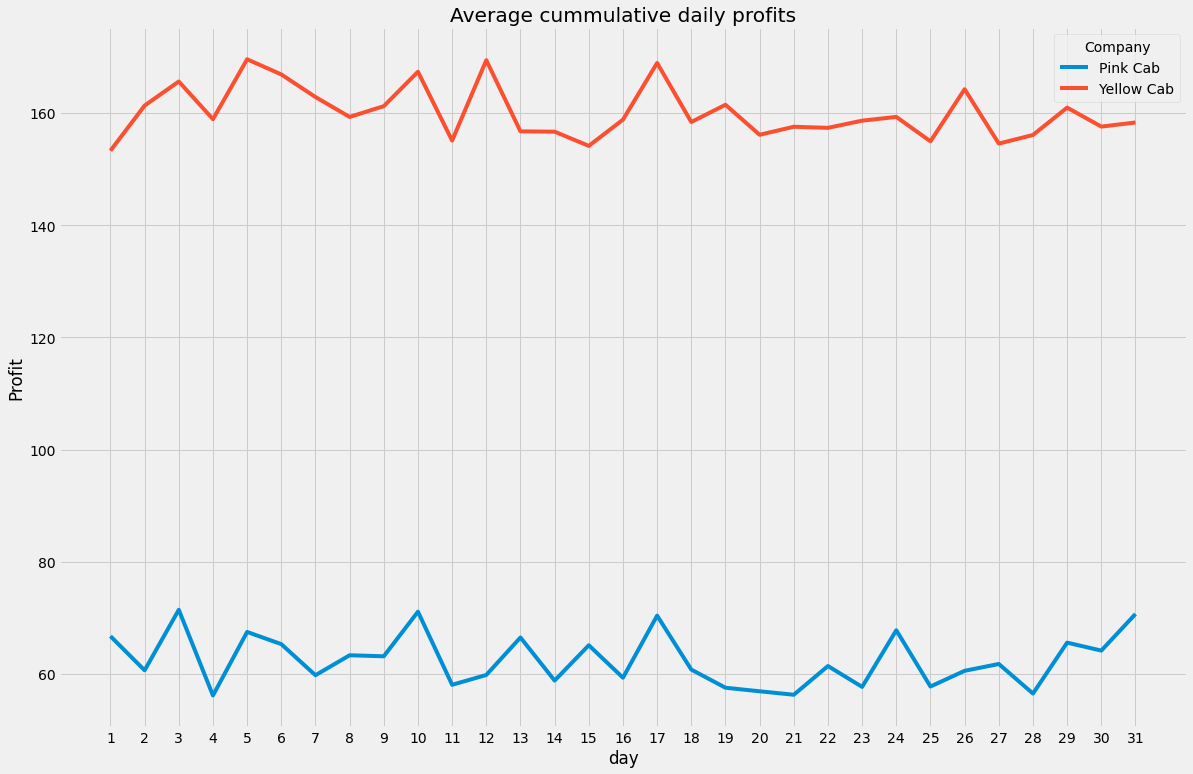

In [57]:
daily_profit = Big_data.groupby(['day', 'Company']).mean()
plt.figure(figsize=(18,12))
sns.lineplot(data=daily_profit, x='day',y='Profit',hue='Company')

label = set()
for i, j in daily_profit.index:
  label.add(i)
plt.title('Average cummulative daily profits')
plt.xticks(list(label))
plt.show()

##### **Insights**
***
The chart above shows a significant difference in the averaged daily earnings earned by the two companies, with Yellow company coming out on top.

#### **Quarterly profit analysis**

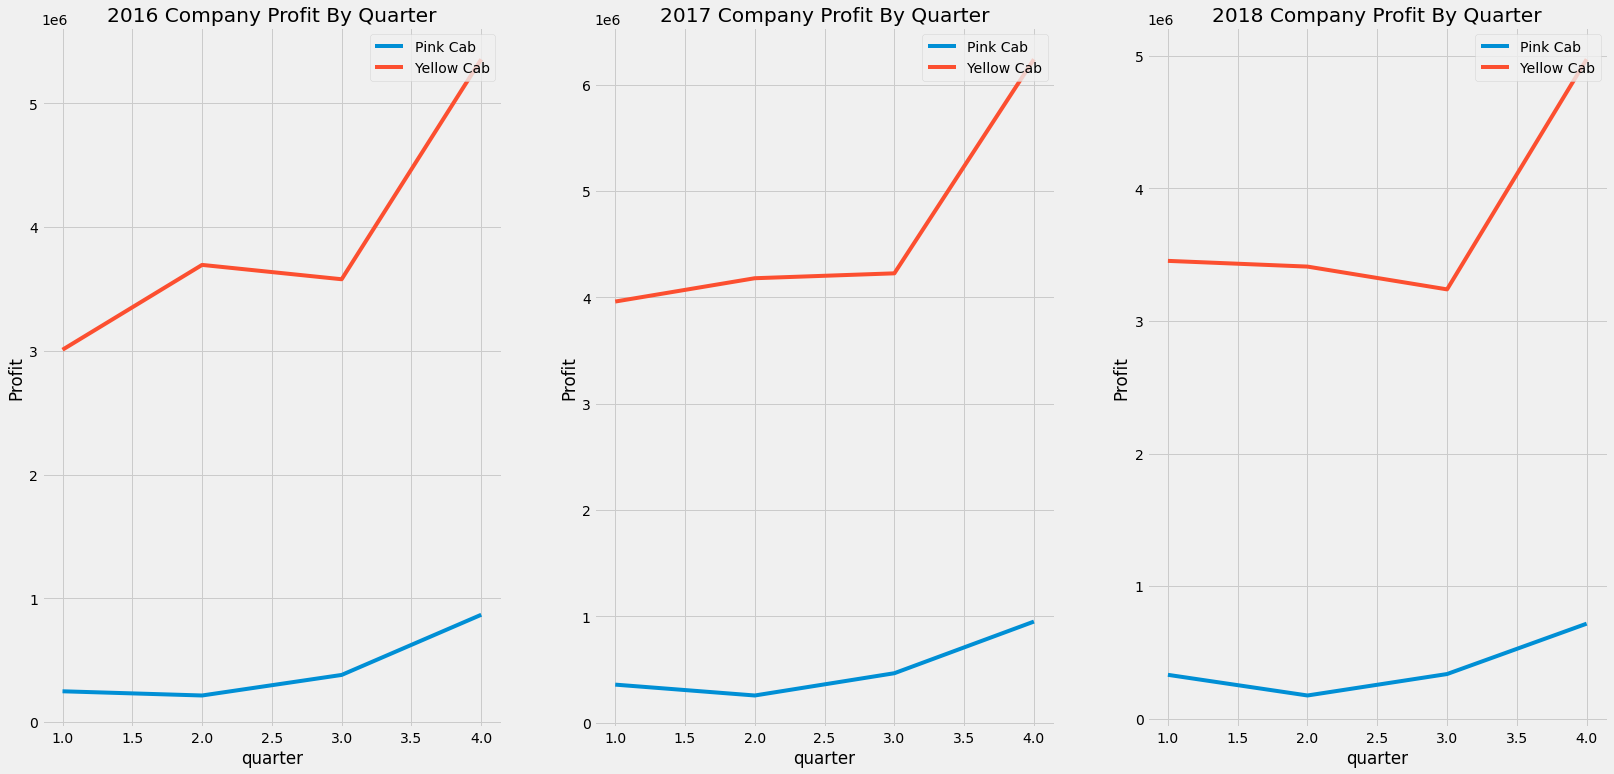

In [58]:
Quarter_data = Big_data.groupby(['Year', 'Company', 'quarter']).sum()['Profit'].unstack('Company').reset_index()

segmentation_Seasonality(Quarter_data,'quarter', 'Quarter', 'line')

##### **Insights**
***
The chart above illustrates that higher profit is earned in the fourth quarter of the year, except in the year 2018 for yellow Company; this increase could be due to a variety of factors, including holiday and festive seasons when families gather. However, there is a significant disparity in the profits earned by the two companies, with Yellow faring better.

#### **Yearly profit analysis**

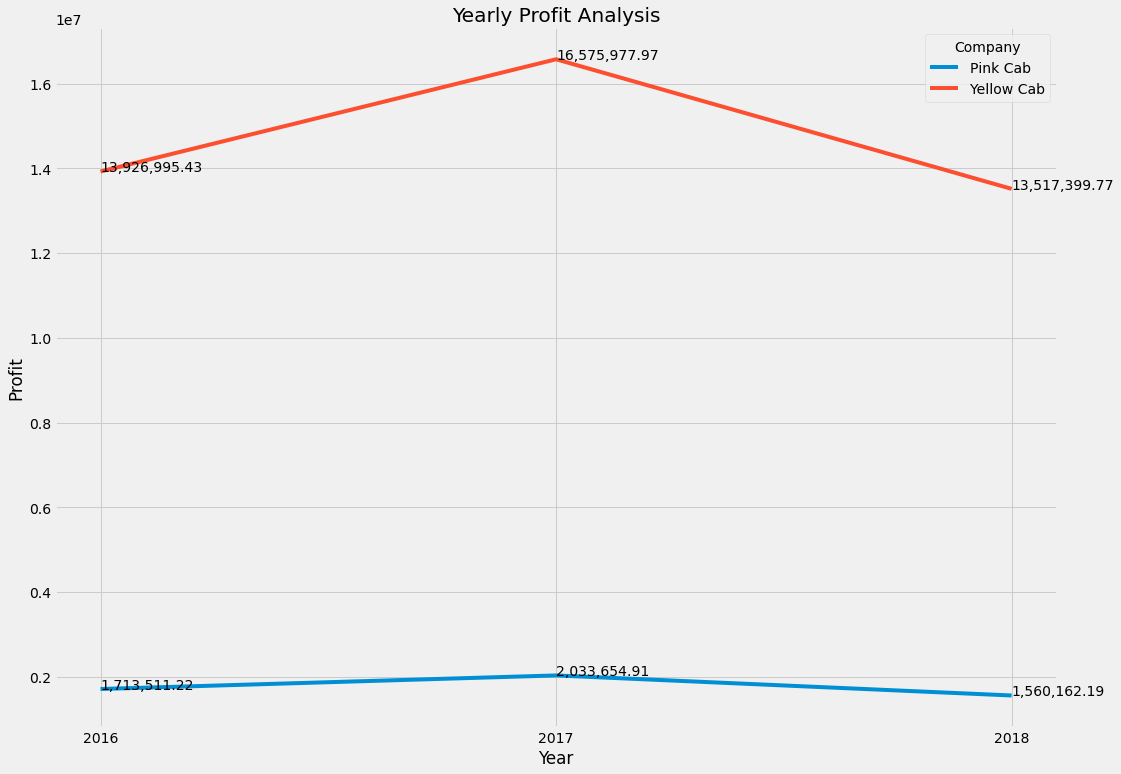

In [59]:
yearly_profit = Big_data.groupby(['Year', 'Company']).sum().reset_index()

plt.figure(figsize = (16,12))
sns.lineplot(data=yearly_profit, x="Year", y="Profit", hue="Company")
plt.xticks([2016, 2017, 2018])
plt.title('Yearly Profit Analysis')
for i, j in zip(yearly_profit['Year'], yearly_profit['Profit']):
  plt.text(i,j, s='{0:,.2f}'.format(j))


##### **Insights**
***
As previously said, the graphic above depicts the supremacy of the Yellow company in terms of profitability.

### **Income Analysis (Lower class, middle class and upper class)**


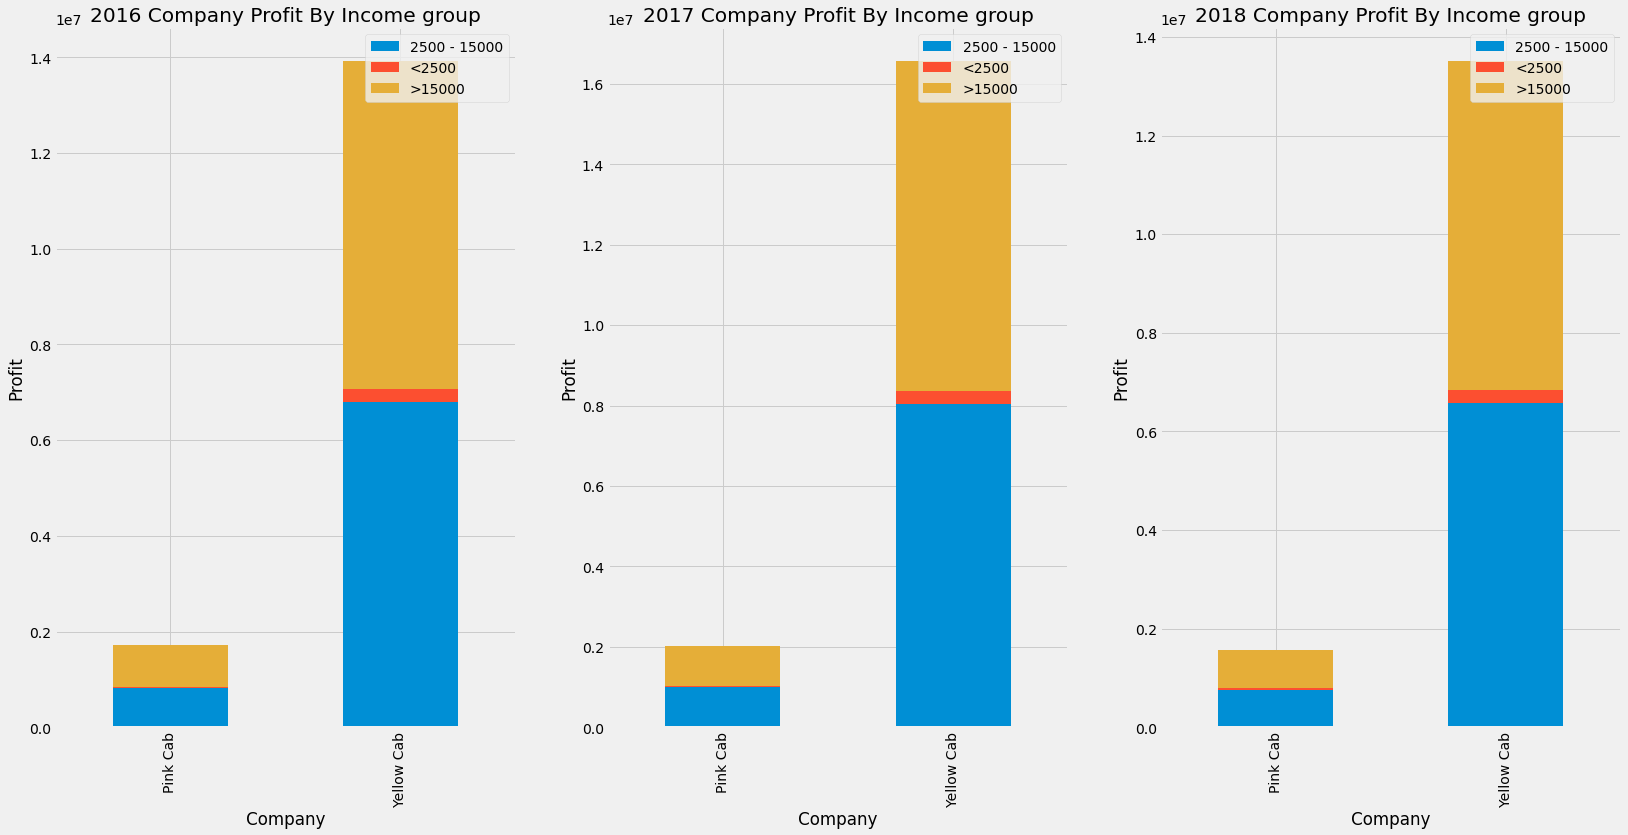

In [60]:
Income_data = Big_data.groupby(['Year', 'Company', 'Income group']).sum()['Profit'].unstack('Income group').reset_index()
segmentation_Seasonality(Income_data,'Company', 'Income group','bar')

##### **Insights**
***
The chart depicts the yellow company's ability to accommodate consumers from all income classes, though lower percentages for lower income classes.

### **Customer Retention Analysis (Returnees)**

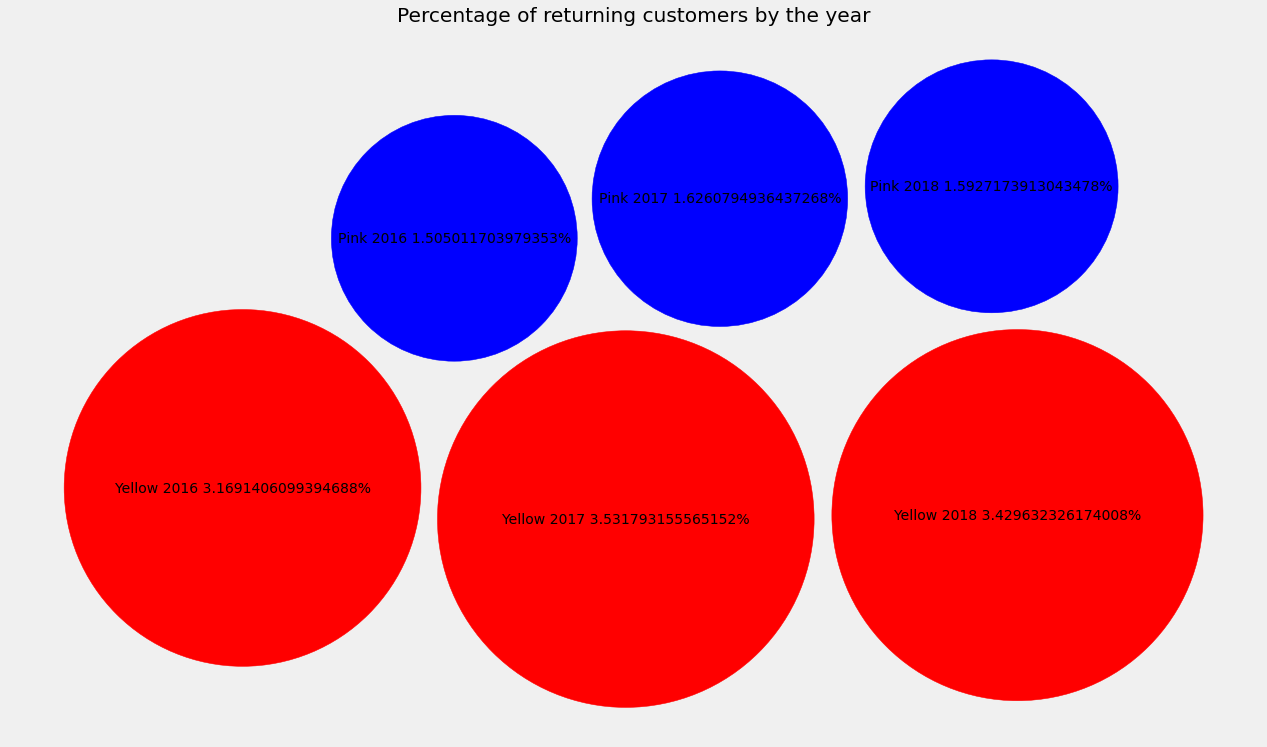

In [72]:
Pink_company = Big_data[Big_data['Company'] == 'Pink Cab']
Yellow_company = Big_data[Big_data['Company'] == 'Yellow Cab']

def cust_ret(df):
  prct_of_returnees = []
  for year in [2016, 2017, 2018]:
    data = df[df['Year'] == year]

    #get the number of unique customer from pink company
    no_of_customer = len(data['Customer ID'].value_counts())
    customer = data['Customer ID']
    count=0
    for i in customer:
      if i >= 5:
        count+=1
      else:
        pass;
    prct_of_returnees.append(count/no_of_customer)
  return prct_of_returnees
    
returnees = pd.DataFrame()    
returnees['prct_of_returnees'] = pd.concat([pd.Series(cust_ret(Yellow_company)), pd.Series(cust_ret(Pink_company))], ignore_index=True)
returnees['company and year'] = pd.Series(['Yellow 2016 {}%'.format(returnees['prct_of_returnees'][0]),
                                           'Yellow 2017 {}%'.format(returnees['prct_of_returnees'][1]),
                                          'Yellow 2018 {}%'.format(returnees['prct_of_returnees'][2]),
                                          'Pink 2016 {}%'.format(returnees['prct_of_returnees'][3]),
                                          'Pink 2017 {}%'.format(returnees['prct_of_returnees'][4]),
                                          'Pink 2018 {}%'.format(returnees['prct_of_returnees'][5])])
returnees['color'] = pd.Series(['red','red','red','blue','blue','blue'])
returnees

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=returnees['prct_of_returnees'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(20,20)
bubble_chart.plot(
    ax, returnees['company and year'], returnees['color'])
ax.axis("off")
ax.relim()

ax.autoscale_view()
ax.set_title('Percentage of returning customers by the year')

plt.show()

##### **Insights**
***
The plot shows a significant disparity in the two cab firms' client retention capacities, with Yellow having a greater customer retention rate.

# **Holiday analysis**

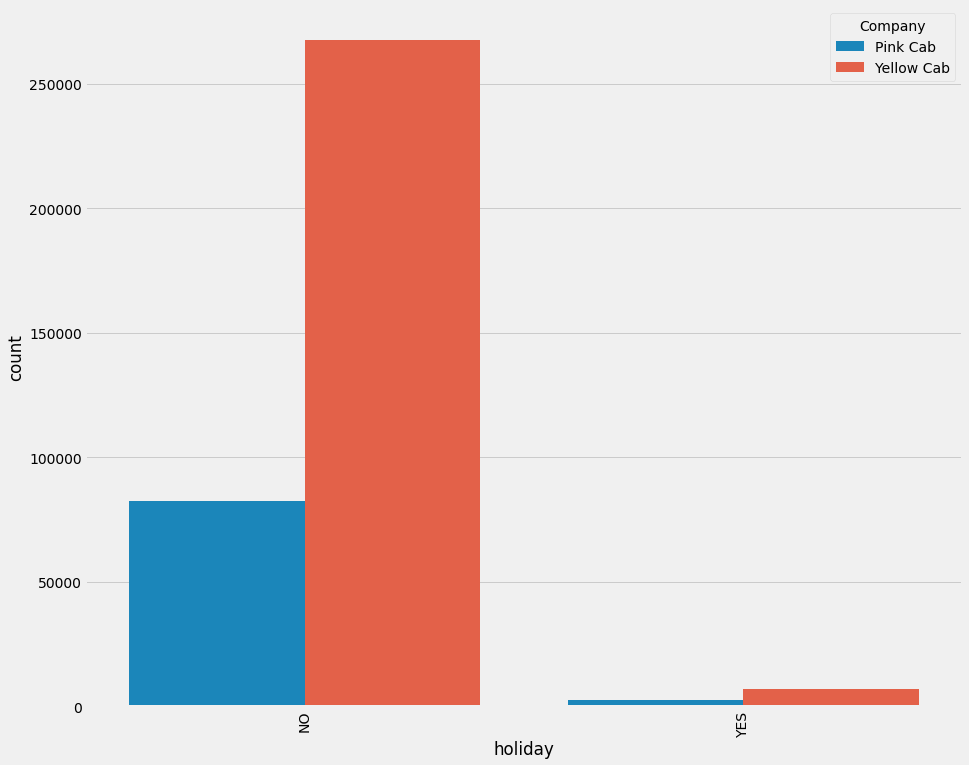

In [62]:
plt.figure(figsize=(14, 12))
ax = sns.countplot(x="holiday", hue="Company", data=Big_data)
plt.xticks(rotation=90)
plt.show()

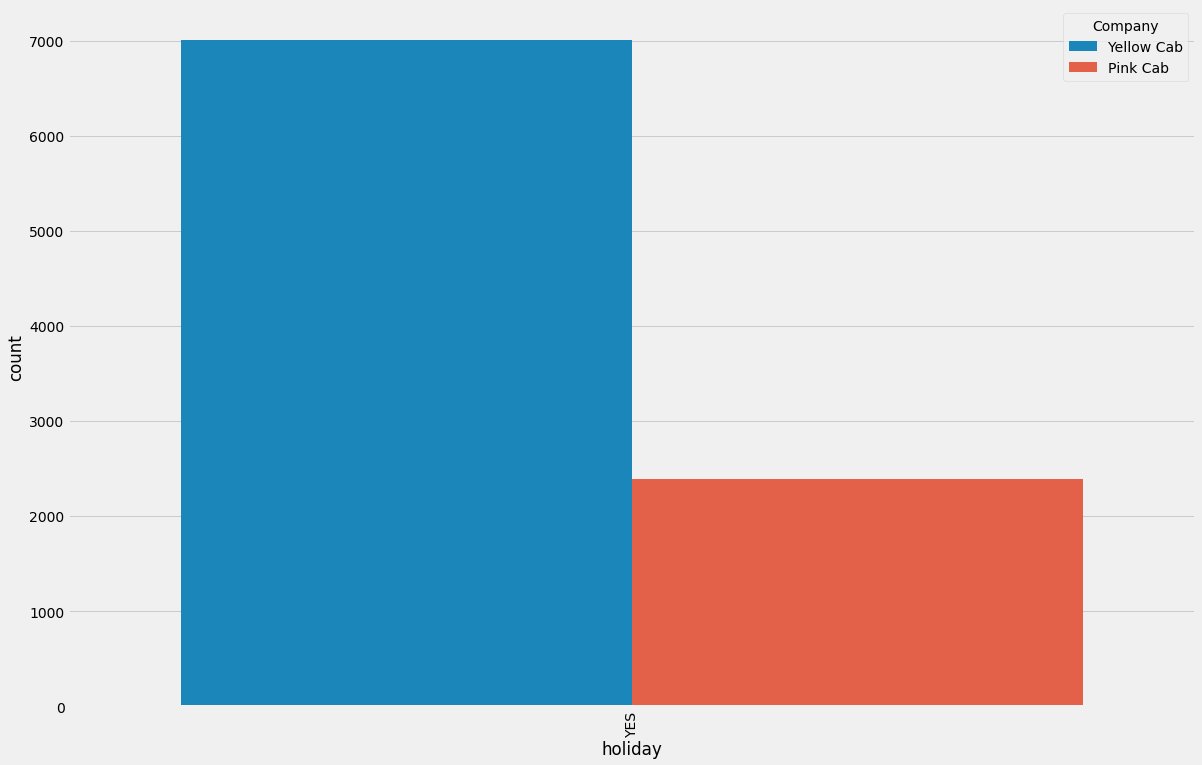

In [63]:
plt.figure(figsize=(18, 12))
ax = sns.countplot(x="holiday", hue="Company", data=Big_data[Big_data['holiday'] == 'YES'])
plt.xticks(rotation=90)
plt.show()

##### **Insights**
***
It is clear from the chart that customers are more likely to opt for Yellow company during holiday periods.

### **Other**

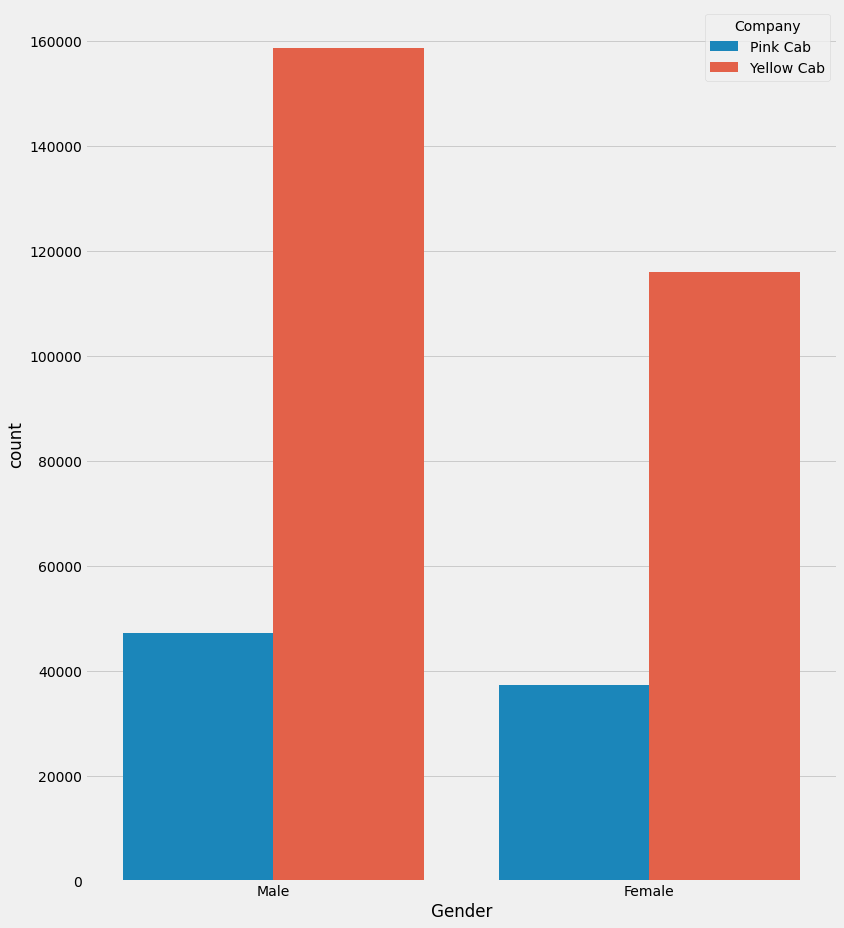

In [64]:
plt.figure(figsize=(12, 15))
ax = sns.countplot(x="Gender", hue="Company", data=Big_data)

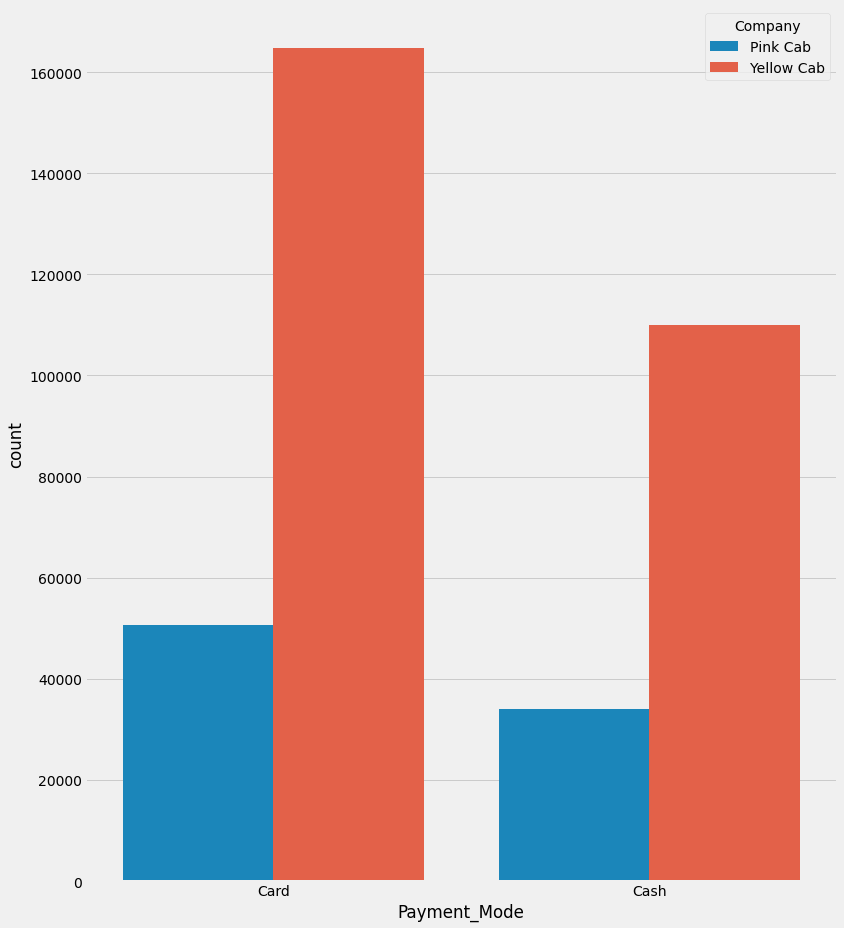

In [65]:
plt.figure(figsize=(12, 15))
ax = sns.countplot(x="Payment_Mode", hue="Company", data=Big_data)

##### **Insights**
***
No meaningful insight could be drawn from Gender and Payment mode between the two companies.

### **7 Conclusion**

In conclusion, the study suggests that investing in the yellow company is a better choice than investing in the pink company based on the many insights gained from this investigation.